In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
import scipy as sp

In [3]:
import statsmodels.api as sm

In [4]:
train = pd.read_csv('train.csv')

In [5]:
test = pd.read_csv('test.csv')

# Introduction

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


* Training data has 54808 rows and 14 columns
* Among 14 columns, 5 have object datatype and 9 have int64 or float64.

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


* Test data has 23490 rows and 13 columns
* Among 13 columns, 5 have object datatype and 8 have int64 or float64.

In [9]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [10]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


# Univariate Analysis

In [11]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

## employee_id

In [12]:
##train['employee_id'].value_counts().max()

In [13]:
train['employee_id'].count()

54808

In [14]:
train['employee_id'].nunique()

54808

In [16]:
train['employee_id'].is_unique

True

* Total number of values and number of unique values are equal. Since each employee_id is unique, we can drop the column from data.

In [6]:
train.drop(columns=['employee_id'], inplace=True)

## department

In [18]:
train['department'].nunique()

9

In [19]:
train['department'].value_counts(normalize=True)

Sales & Marketing    0.307254
Operations           0.207050
Technology           0.130236
Procurement          0.130236
Analytics            0.097650
Finance              0.046271
HR                   0.044118
Legal                0.018957
R&D                  0.018227
Name: department, dtype: float64

* There are 9 departments and half of the employees belong to 2 departments.
* 4 departments have less than 5% employees each.

## region

In [20]:
train['region'].nunique()

34

In [21]:
train['region'].value_counts(normalize=True)

region_2     0.225204
region_22    0.117282
region_7     0.088363
region_15    0.051233
region_13    0.048314
region_26    0.041235
region_31    0.035305
region_4     0.031072
region_27    0.030269
region_16    0.026730
region_28    0.024048
region_11    0.023993
region_23    0.021438
region_29    0.018136
region_32    0.017242
region_19    0.015947
region_20    0.015509
region_14    0.015089
region_25    0.014943
region_17    0.014523
region_5     0.013976
region_6     0.012589
region_30    0.011987
region_8     0.011951
region_10    0.011823
region_1     0.011130
region_24    0.009269
region_12    0.009123
region_9     0.007663
region_21    0.007499
region_3     0.006313
region_34    0.005328
region_33    0.004908
region_18    0.000566
Name: region, dtype: float64

* There are 34 regions and half of the employees belong to 5 regions.
* most regions have less than 2% of employees each.

## education

In [22]:
train['education'].value_counts(normalize=True)

Bachelor's          0.699803
Master's & above    0.284834
Below Secondary     0.015363
Name: education, dtype: float64

* There are 3 education categories.
* Around 70 % have Bachelor's and less than 2 % have Below Secondary education.

## gender

In [23]:
train['gender'].value_counts(normalize=True)

m    0.702379
f    0.297621
Name: gender, dtype: float64

* Around 70 % are males and around 30 %  are females.

## recruitment_channel

In [24]:
train['recruitment_channel'].value_counts(normalize=True)

other       0.555503
sourcing    0.423661
referred    0.020836
Name: recruitment_channel, dtype: float64

* There are 3 Recruitment channels.
* Referred channel has only 2 % of employees while sourcing channel and other channel consist of rest of the employees.

## no_of_trainings

<AxesSubplot:xlabel='no_of_trainings', ylabel='Count'>

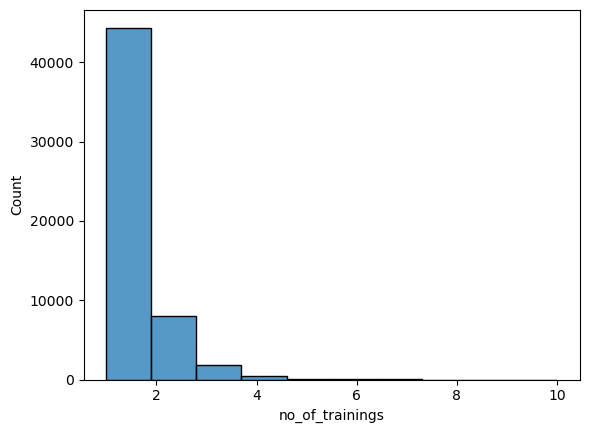

In [25]:
sns.histplot(train['no_of_trainings'], bins=10)

In [26]:
train['no_of_trainings'].mean()

1.253010509414684

In [27]:
train['no_of_trainings'].value_counts(normalize=True)

1     0.809699
2     0.145727
3     0.032404
4     0.008539
5     0.002335
6     0.000803
7     0.000219
8     0.000091
10    0.000091
9     0.000091
Name: no_of_trainings, dtype: float64

* no_of_trainings done by employees varies from 1 to 10.
* 80 % of employees done one training and 14 % have done two trainings and only around 5 % of employees have done more than 2 trainings. 

## age

<AxesSubplot:xlabel='age', ylabel='Count'>

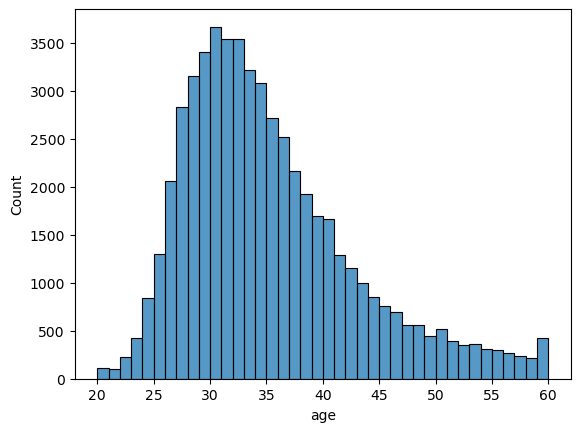

In [28]:
sns.histplot(train['age'], bins=40)

In [29]:
train['age'].mean()

34.80391548679025

In [30]:
train['age'].median()

33.0

* Age appears to be slightly right skewed based on histogram, mean and median values.

Let's see if we can transform the age data to fit into normal distribution

qqplot of age variable

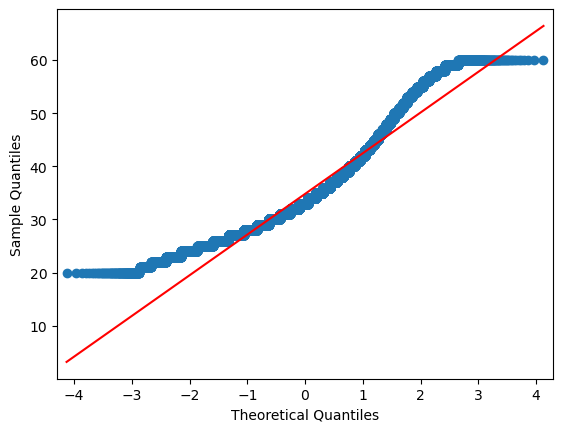

In [31]:
sm.qqplot(train['age'], line='s');

qqplot of age variable after applying logarithm

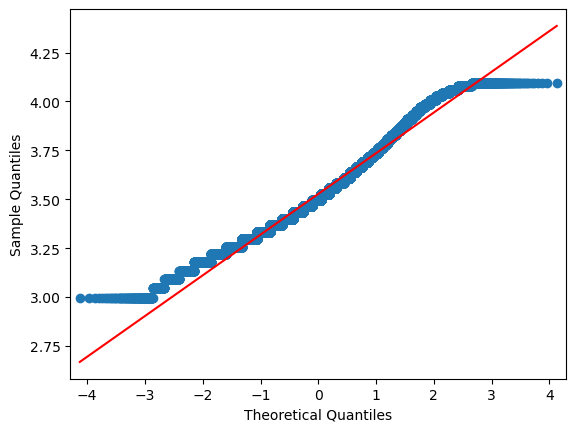

In [32]:
sm.qqplot(np.log(train['age']), line='s');

* Applying log makes the variable fit more into normal distribution

## previous_year_rating

<AxesSubplot:xlabel='previous_year_rating', ylabel='Count'>

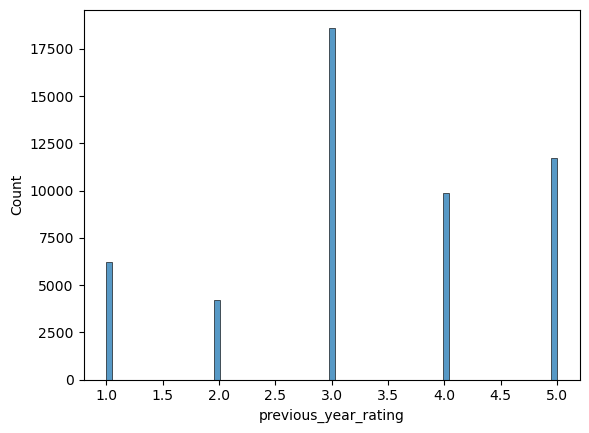

In [33]:
sns.histplot(train['previous_year_rating'])

In [34]:
train['previous_year_rating'].mean()

3.329255780917055

In [35]:
train['previous_year_rating'].median()

3.0

In [36]:
train['previous_year_rating'].value_counts(normalize=True)

3.0    0.367335
5.0    0.231651
4.0    0.194874
1.0    0.122780
2.0    0.083360
Name: previous_year_rating, dtype: float64

* previous_year_rating can be treated as categorical variable and it has five categories from 1 to 5.

## length_of_service

<AxesSubplot:xlabel='length_of_service', ylabel='Count'>

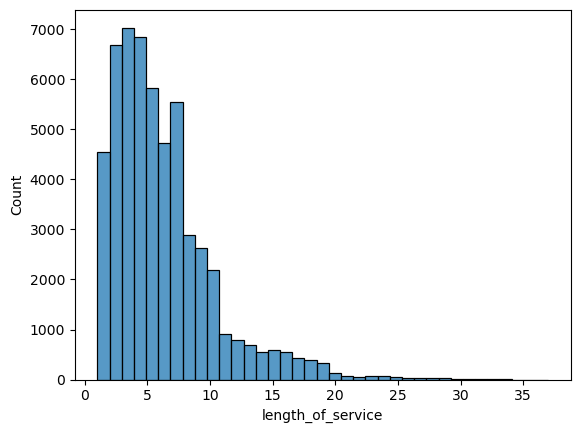

In [37]:
sns.histplot(train['length_of_service'], bins=37)

In [38]:
train['length_of_service'].mean()

5.865512333965844

In [39]:
train['length_of_service'].median()

5.0

* length_of_service appears to be right skewed based on histogram, mean and median values.

Let's see if we can transform the length_of_service data to fit into normal distribution

qqplot of length_of_service variable

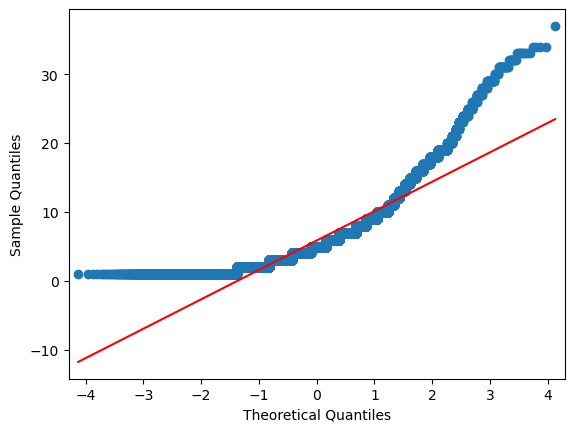

In [40]:
sm.qqplot(train['length_of_service'], line='s');

qqplot of the variable after applying logarithm

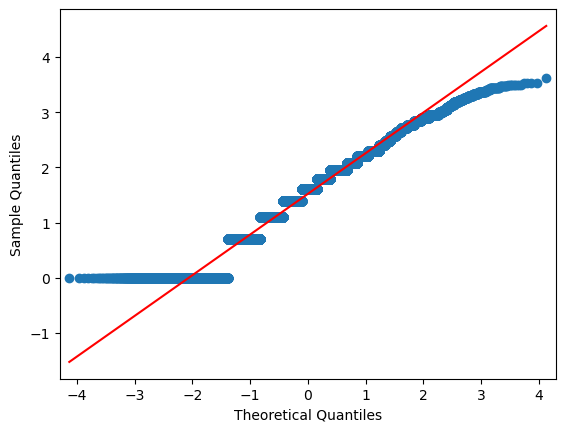

In [41]:
sm.qqplot(np.log(train['length_of_service']), line='s');

* Applying log makes the variable fit more into normal distribution

## KPIs_met > 80 %

<AxesSubplot:xlabel='KPIs_met >80%', ylabel='Count'>

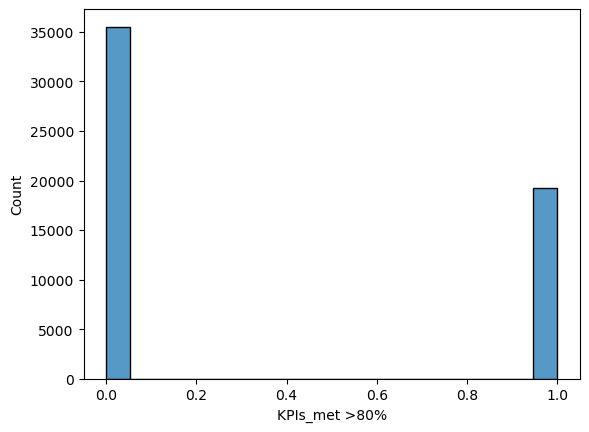

In [42]:
sns.histplot(train['KPIs_met >80%'])

In [43]:
train['KPIs_met >80%'].value_counts(normalize=True)

0    0.648026
1    0.351974
Name: KPIs_met >80%, dtype: float64

* KPIs_met > 80 % is binary variable.
* 35 % of employees met more than 80 % of KPIs.

## awards_won?

<AxesSubplot:xlabel='awards_won?', ylabel='Count'>

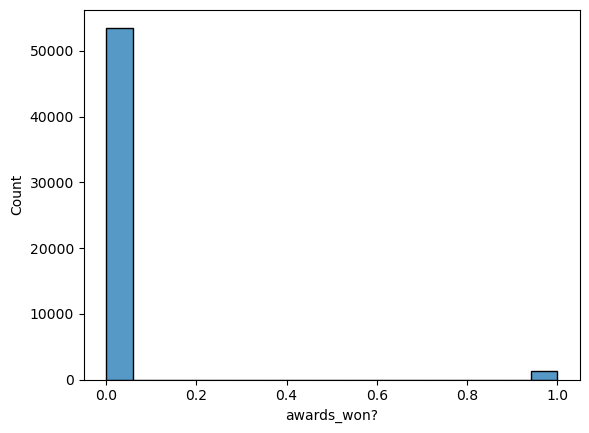

In [44]:
sns.histplot(train['awards_won?'])

In [45]:
train['awards_won?'].value_counts(normalize=True)

0    0.976828
1    0.023172
Name: awards_won?, dtype: float64

* awards_won? is binary variable.
* Only 2.3 % of employees have won an award.

## avg_training_score

<AxesSubplot:xlabel='avg_training_score', ylabel='Count'>

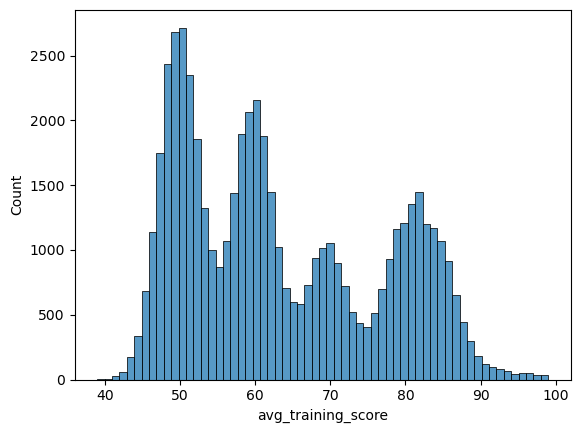

In [46]:
sns.histplot(train['avg_training_score'], bins=61)

In [47]:
train['avg_training_score'].mean()

63.38675010947307

In [48]:
train['avg_training_score'].median()

60.0

* avg_training_score variable is more uniform with multiple peaks rather than resembling normal distribution

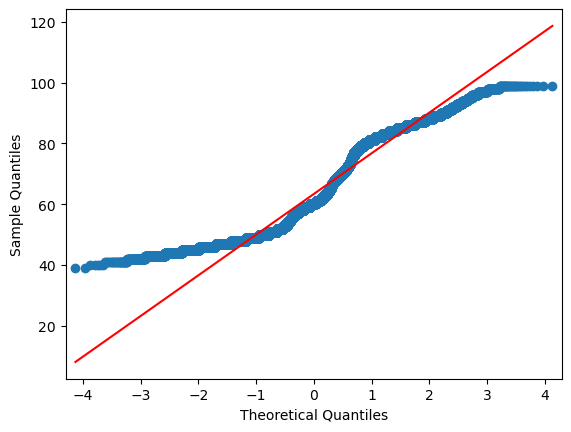

In [49]:
sm.qqplot(train['avg_training_score'], line='s');

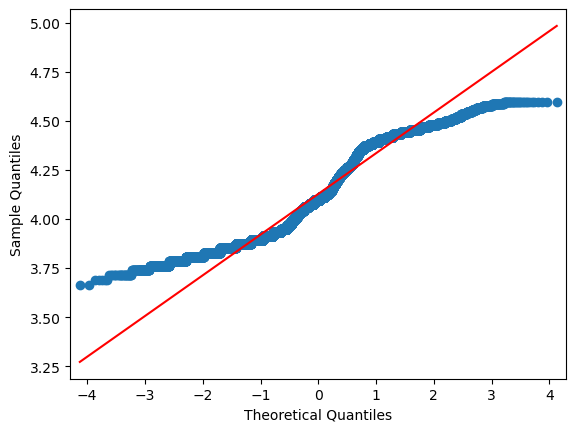

In [50]:
sm.qqplot(np.log(train['avg_training_score']), line='s');

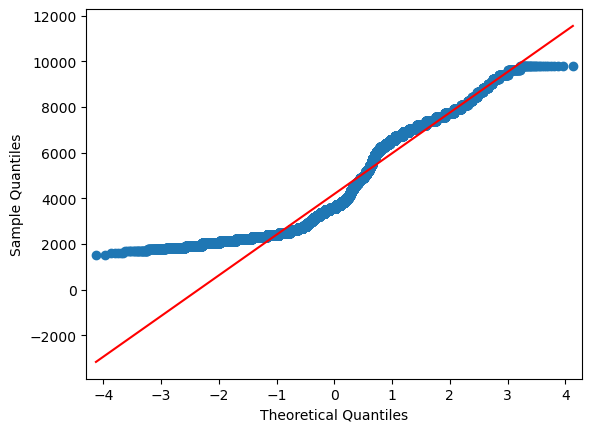

In [51]:
sm.qqplot((train['avg_training_score'])**2, line='s');

## is_promoted

<AxesSubplot:xlabel='is_promoted', ylabel='count'>

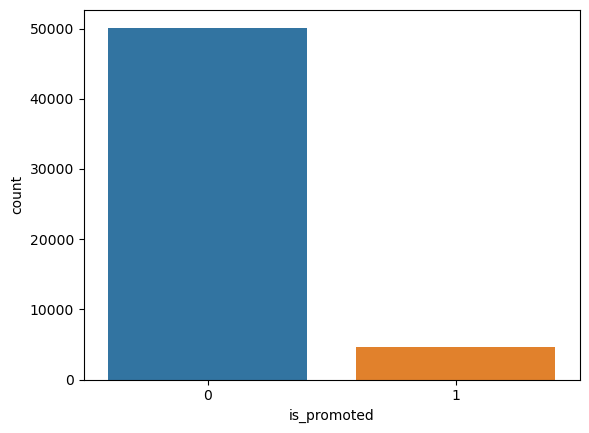

In [82]:
sns.countplot(x=train['is_promoted'])

In [79]:
train['is_promoted'].value_counts(normalize=True)

0    0.91483
1    0.08517
Name: is_promoted, dtype: float64

* is_promoted? is target variable.
* Only 8.5 % of employees have been promoted, so target variable has imbalance.

<b>Categorizing variables into categorical and continuous based on the above univariate analysis.<b/>

In [13]:
categorical = ['department', 'region', 'education', 'gender', 'recruitment_channel', 'no_of_trainings', 
               'previous_year_rating', 'KPIs_met >80%', 'awards_won?', 'is_promoted']

In [14]:
continuous = ['age', 'length_of_service', 'avg_training_score']

# Uni-variate Visualizations

## count plot of categorical variables

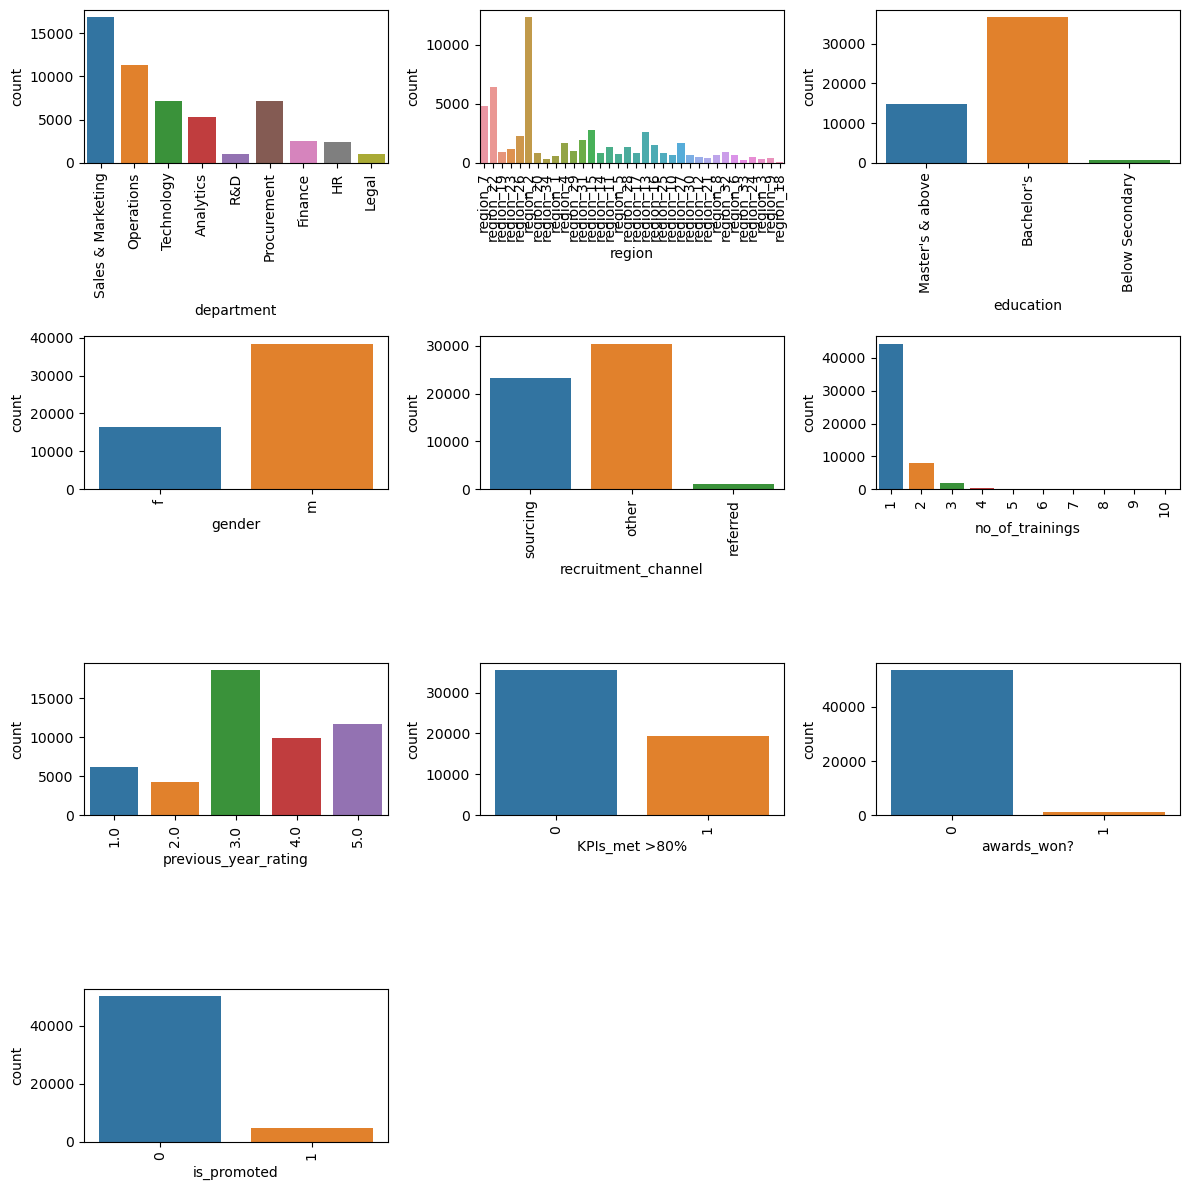

In [89]:
plt.figure(figsize=(12,12))
for i, col in enumerate(categorical):
    plt.subplot(4, 3, i+1)
    sns.countplot(data=train, x=col)
    plt.xticks(rotation=90)
plt.tight_layout()

## histogram

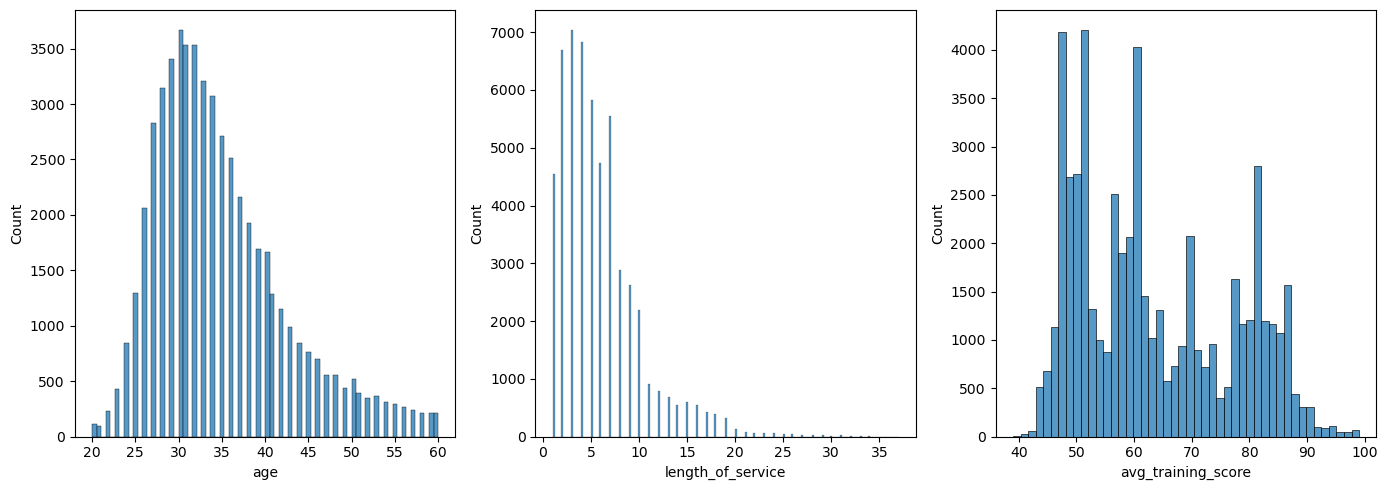

In [90]:
plt.figure(figsize=(14,5))
for i, col in enumerate(continuous):
    plt.subplot(1, 3, i+1)
    sns.histplot(data=train, x=col)
plt.tight_layout()

## Boxplot

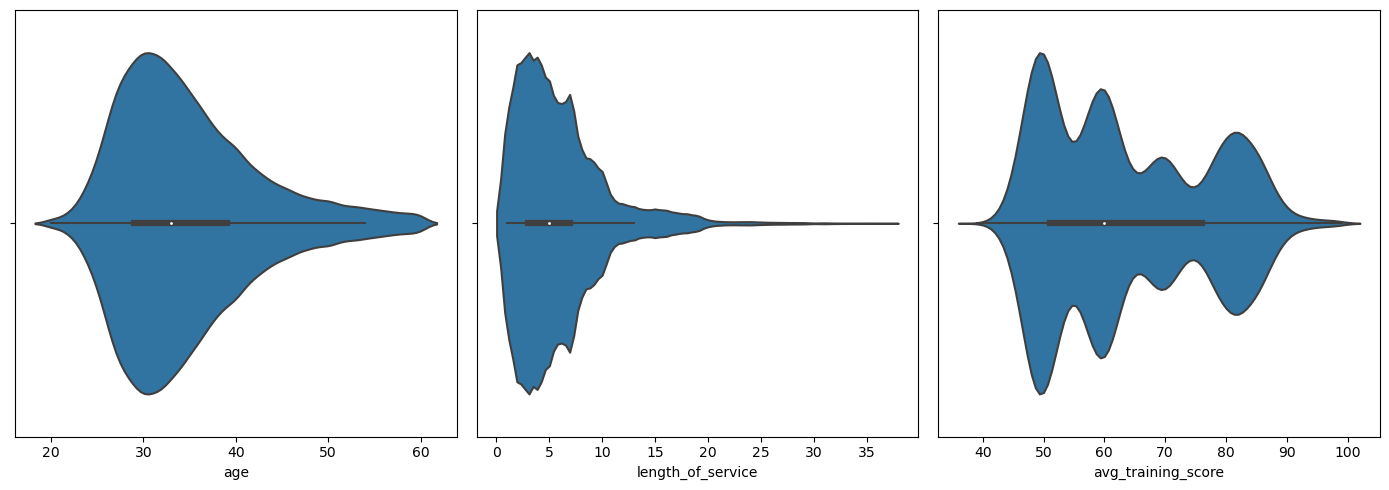

In [91]:
plt.figure(figsize=(14,5))
for i, col in enumerate(continuous):
    plt.subplot(1, 3, i+1)
    sns.violinplot(data=train, x=col)
plt.tight_layout()

# Bi-varaite Analysis w.r.t target variable

## bar plot

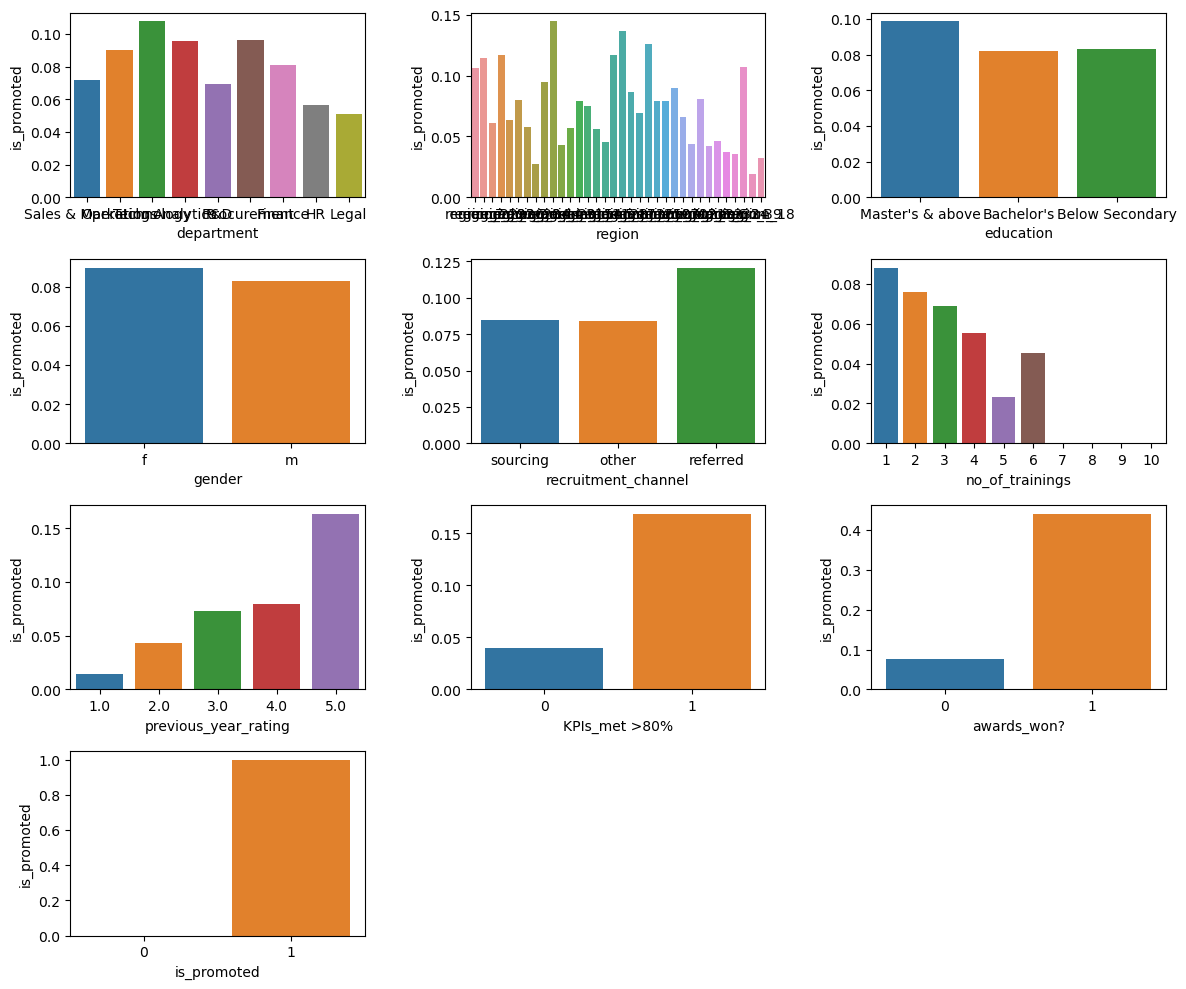

In [92]:
plt.figure(figsize=(12,10))
for i, col in enumerate(categorical):
    plt.subplot(4,3,i+1)
    sns.barplot(data=train, x=col,  y='is_promoted', errorbar=None)
plt.tight_layout()

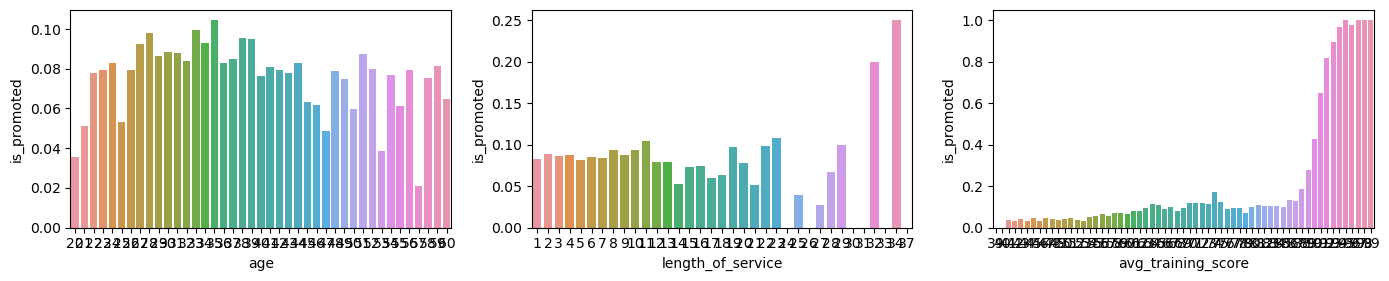

In [59]:
plt.figure(figsize=(14,8))
for i, col in enumerate(continuous):
    plt.subplot(3,3,i+1)
    sns.barplot(data=train, x=col,  y='is_promoted', errorbar=None)
plt.tight_layout()

## violin plot

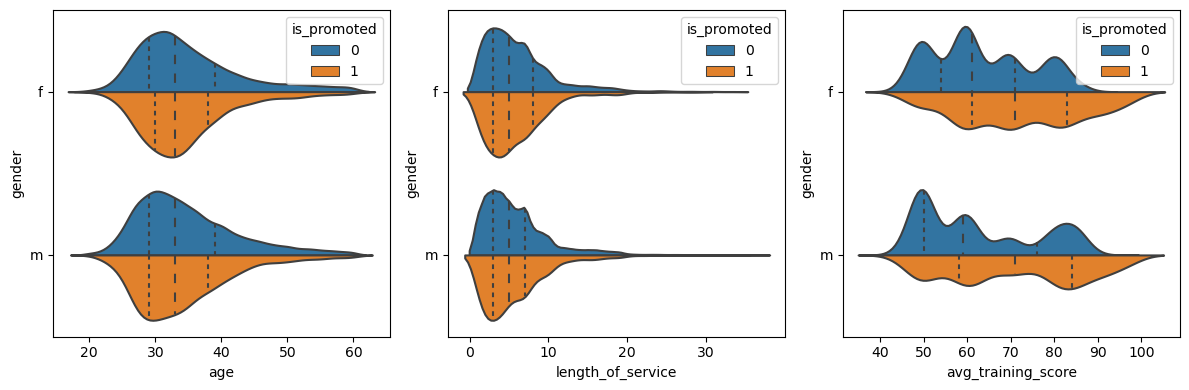

In [101]:
plt.figure(figsize=(12,4))
for i, col in enumerate(continuous):
    plt.subplot(1,3,i+1)
    sns.violinplot(data=train, x=col, y='gender',  hue='is_promoted', orient='h', split=True, scale='area', inner='quartile')
plt.tight_layout()

## count plot

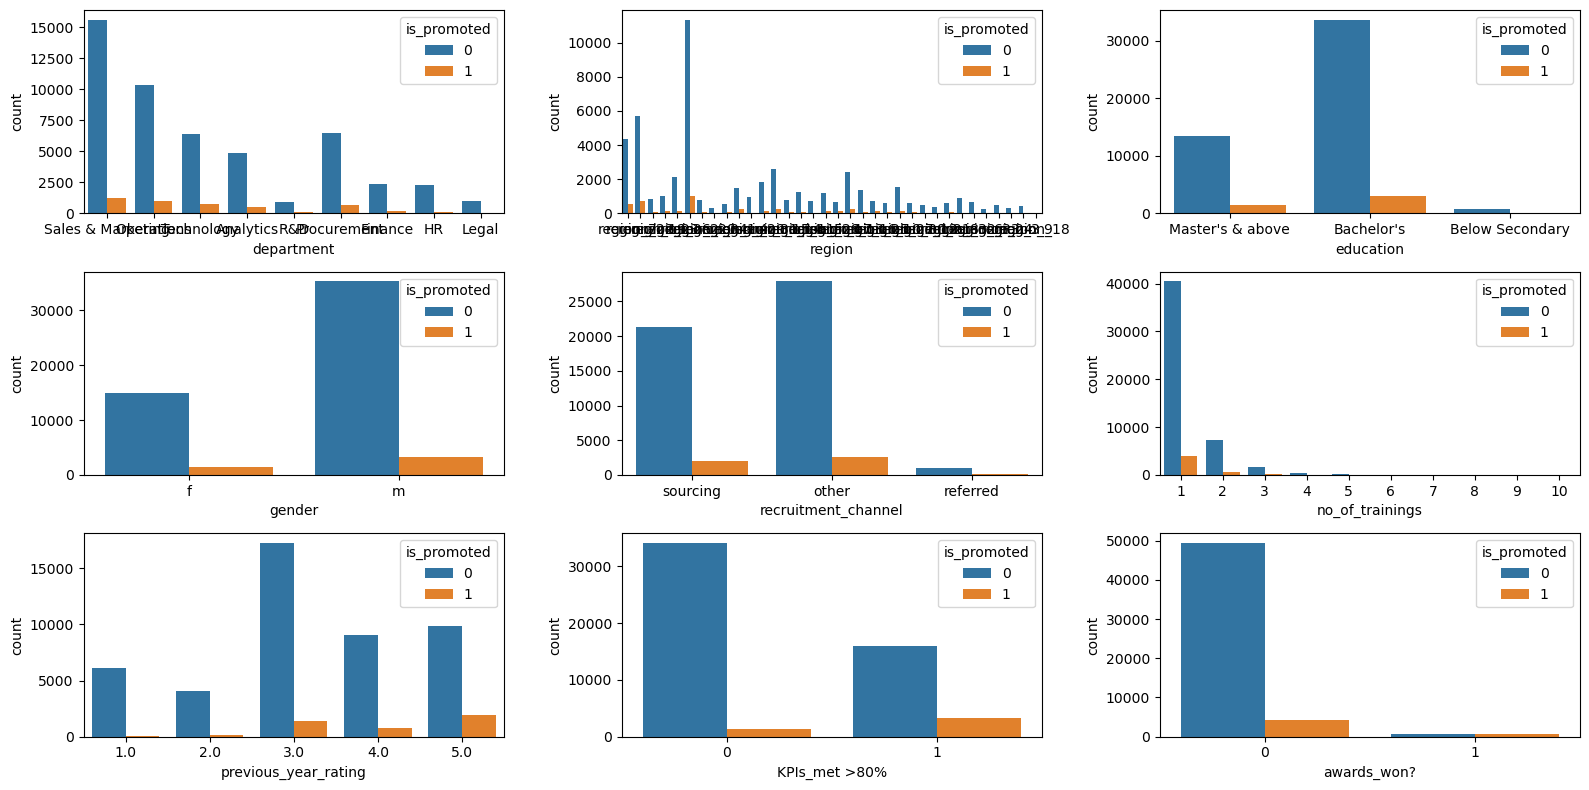

In [60]:
plt.figure(figsize=(16,8))
for i, col in enumerate(categorical):
    plt.subplot(3,3,i+1)
    sns.countplot(data=train, x=col, hue='is_promoted')
plt.tight_layout()

## normalized plots

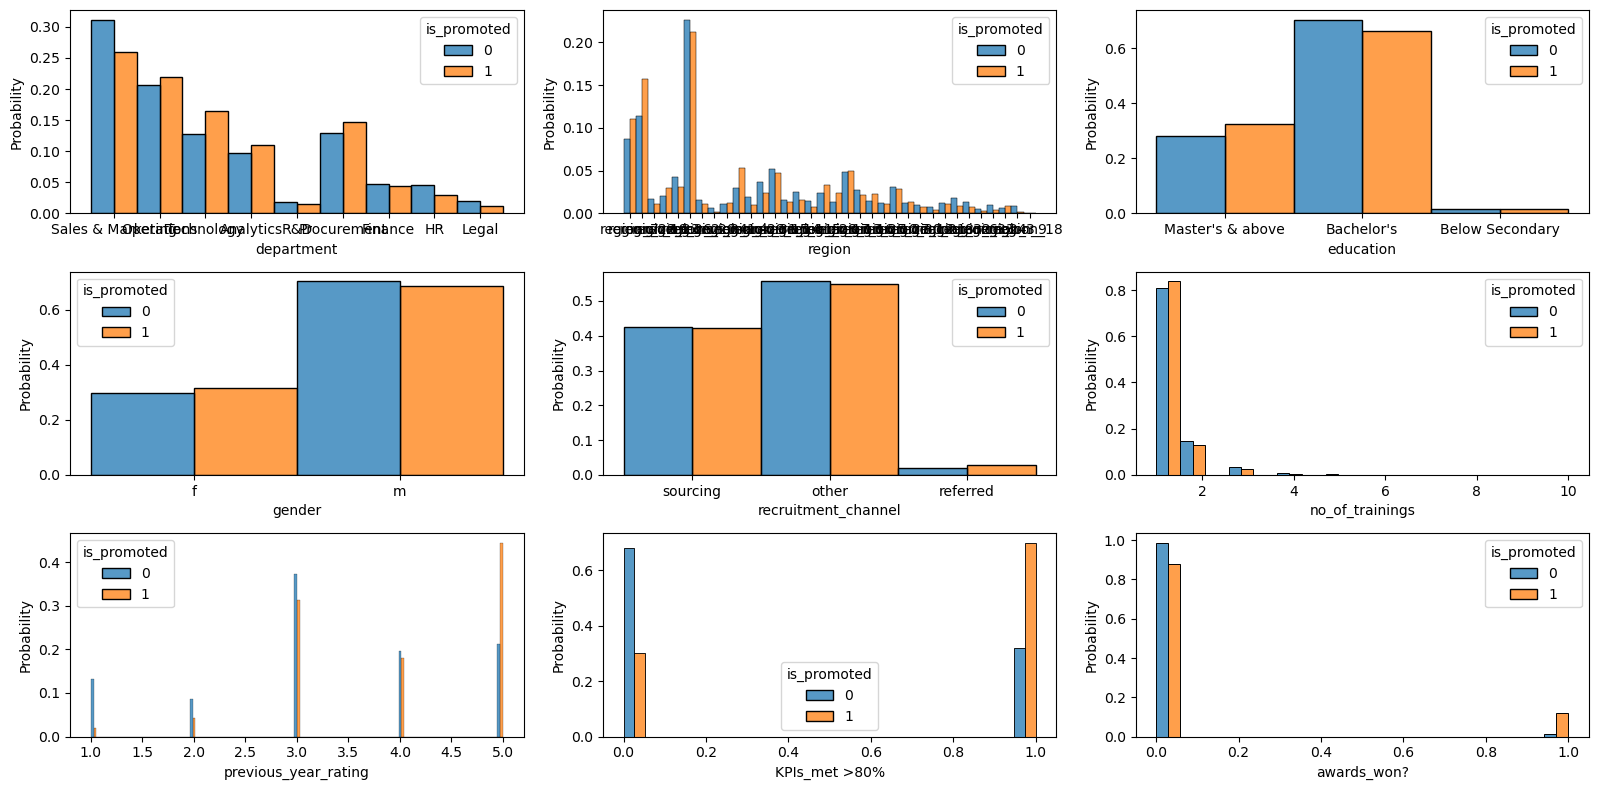

In [61]:
plt.figure(figsize=(16,8))
for i, col in enumerate(categorical):
    plt.subplot(3,3,i+1)
    sns.histplot(x=train[categorical[i]], hue=train['is_promoted'], multiple='dodge', stat='probability', common_norm=False)
plt.tight_layout()

<AxesSubplot:>

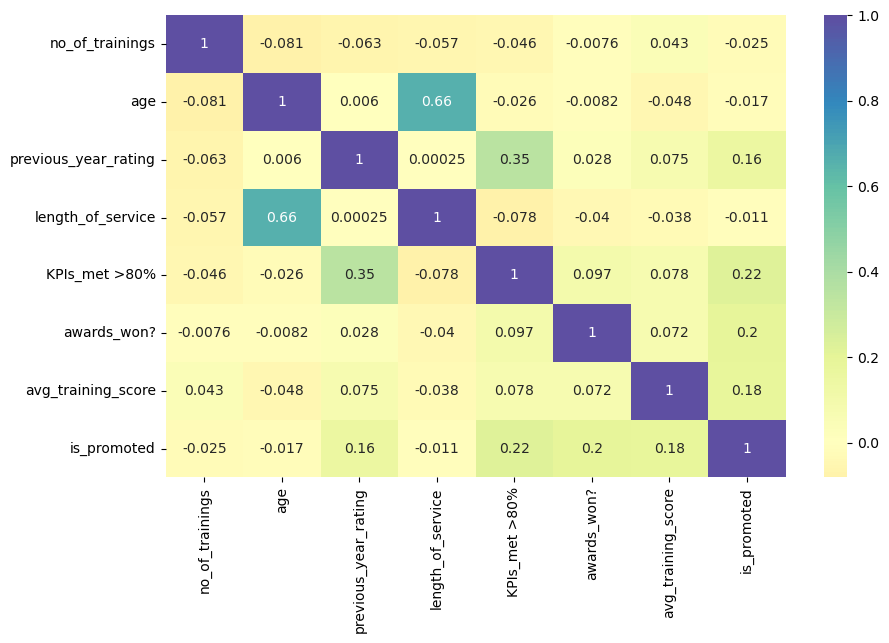

In [62]:
plt.figure(figsize=(10, 6))
sns.heatmap(train.corr(), cmap='Spectral', annot=True, center=0)

# correlations

In [100]:
continuous

['age', 'length_of_service', 'avg_training_score']

In [101]:
categorical

['department',
 'region',
 'education',
 'gender',
 'recruitment_channel',
 'no_of_trainings',
 'previous_year_rating',
 'KPIs_met >80%',
 'awards_won?',
 'is_promoted']

In [102]:
from itertools import product

In [103]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.nanmean(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

In [104]:
def cat_cont(df, categorical_features, continuous_features):
    eta_corr = []
    for pair in product(categorical_features, continuous_features):
        try:
            eta_corr.append(correlation_ratio(df[pair[0]], df[pair[1]]))
        except ValueError:
            eta_corr.append(0)
    eta_corr = np.array(eta_corr).reshape(len(categorical_features),len(continuous_features))
    eta_corr = pd.DataFrame(eta_corr, index=categorical_features, columns=continuous_features)
    return eta_corr

In [105]:
cat_cont_corr = cat_cont(train, categorical, continuous)

In [106]:
cat_cont_corr

,age,length_of_service,avg_training_score
department,0.159133,0.126420,0.937907
region,0.342439,0.231530,0.113407
education,0.382883,0.262719,0.024139
gender,0.016293,0.019675,0.024494
recruitment_channel,0.043431,0.030378,0.030645
no_of_trainings,0.088610,0.061794,0.067241
previous_year_rating,0.018228,0.009913,0.099541
KPIs_met >80%,0.025592,0.077693,0.078391
awards_won?,0.008169,0.039927,0.072138
is_promoted,0.017166,0.010670,0.181147


In [114]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = sp.stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [115]:
def cat_cat(df, cat_features):
    cramers_v_corr = []
    for pair in product(cat_features, repeat=2):
        try:
            cramers_v_corr.append(cramers_v(df[pair[0]], df[pair[1]]))
        except ValueError:
            cramers_v_corr.append(0)
    cramers_v_corr = np.array(cramers_v_corr).reshape(len(cat_features),len(cat_features))
    cramers_v_corr = pd.DataFrame(cramers_v_corr, index=cat_features, columns=cat_features)
    return cramers_v_corr

In [116]:
cat_cat_corr = cat_cat(train, categorical)

In [117]:
cat_cat_corr

,department,region,education,gender,recruitment_channel,no_of_trainings,previous_year_rating,KPIs_met >80%,awards_won?,is_promoted
department,1.000000,0.131925,0.123696,0.286383,0.062203,0.056989,0.108561,0.135831,0.005687,0.051156
region,0.131925,1.000000,0.180786,0.161475,0.110478,0.039879,0.050982,0.087913,0.017097,0.089868
education,0.123696,0.180786,1.000000,0.027272,0.026726,0.027476,0.020624,0.010805,0.000000,0.025735
gender,0.286383,0.161475,0.027272,0.999956,0.007557,0.087358,0.026835,0.037114,0.000000,0.010178
recruitment_channel,0.062203,0.110478,0.026726,0.007557,1.000000,0.013185,0.050250,0.047253,0.001887,0.017734
no_of_trainings,0.056989,0.039879,0.027476,0.087358,0.013185,1.000000,0.040017,0.045787,0.000000,0.021836
previous_year_rating,0.108561,0.050982,0.020624,0.026835,0.050250,0.040017,1.000000,0.370144,0.028507,0.169754
KPIs_met >80%,0.135831,0.087913,0.010805,0.037114,0.047253,0.045787,0.370144,0.999960,0.096779,0.221474
awards_won?,0.005687,0.017097,0.000000,0.000000,0.001887,0.000000,0.028507,0.096779,0.999597,0.195609
is_promoted,0.051156,0.089868,0.025735,0.010178,0.017734,0.021836,0.169754,0.221474,0.195609,0.999883


In [118]:
all_corr = pd.concat([pd.merge(cat_cat_corr, cat_cont_corr, left_index=True, right_index=True), train.loc[:, continuous].corr()])

In [119]:
all_corr.update(cat_cont_corr.T)

In [120]:
all_corr

,department,region,education,gender,recruitment_channel,no_of_trainings,previous_year_rating,KPIs_met >80%,awards_won?,is_promoted,age,length_of_service,avg_training_score
department,1.000000,0.131925,0.123696,0.286383,0.062203,0.056989,0.108561,0.135831,0.005687,0.051156,0.159133,0.126420,0.937907
region,0.131925,1.000000,0.180786,0.161475,0.110478,0.039879,0.050982,0.087913,0.017097,0.089868,0.342439,0.231530,0.113407
education,0.123696,0.180786,1.000000,0.027272,0.026726,0.027476,0.020624,0.010805,0.000000,0.025735,0.382883,0.262719,0.024139
gender,0.286383,0.161475,0.027272,0.999956,0.007557,0.087358,0.026835,0.037114,0.000000,0.010178,0.016293,0.019675,0.024494
recruitment_channel,0.062203,0.110478,0.026726,0.007557,1.000000,0.013185,0.050250,0.047253,0.001887,0.017734,0.043431,0.030378,0.030645
no_of_trainings,0.056989,0.039879,0.027476,0.087358,0.013185,1.000000,0.040017,0.045787,0.000000,0.021836,0.088610,0.061794,0.067241
previous_year_rating,0.108561,0.050982,0.020624,0.026835,0.050250,0.040017,1.000000,0.370144,0.028507,0.169754,0.018228,0.009913,0.099541
KPIs_met >80%,0.135831,0.087913,0.010805,0.037114,0.047253,0.045787,0.370144,0.999960,0.096779,0.221474,0.025592,0.077693,0.078391
awards_won?,0.005687,0.017097,0.000000,0.000000,0.001887,0.000000,0.028507,0.096779,0.999597,0.195609,0.008169,0.039927,0.072138
is_promoted,0.051156,0.089868,0.025735,0.010178,0.017734,0.021836,0.169754,0.221474,0.195609,0.999883,0.017166,0.010670,0.181147


<AxesSubplot:>

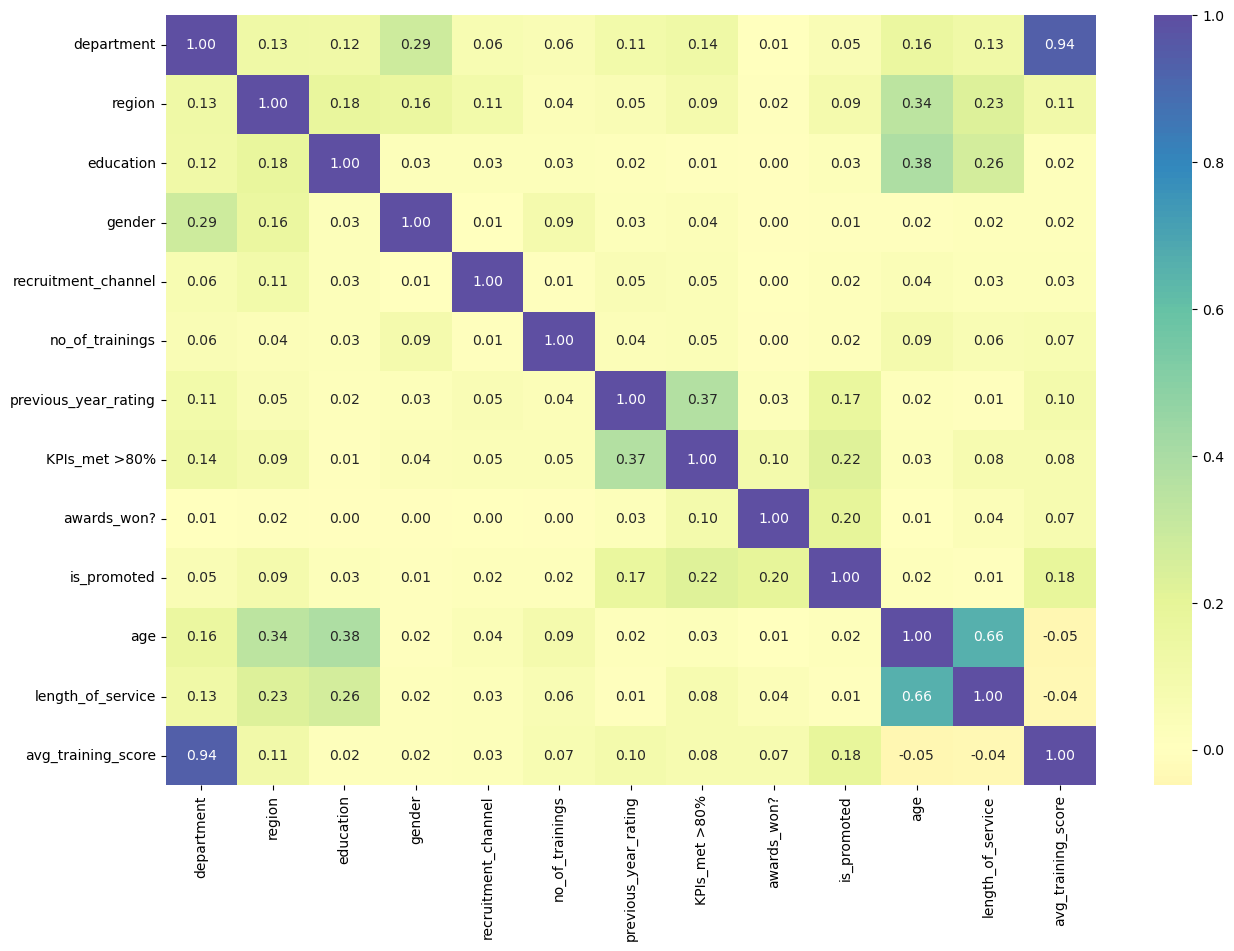

In [121]:
plt.figure(figsize=(15,10))
sns.heatmap(all_corr, annot=True, cmap='Spectral', center=0, fmt='.2f')

<AxesSubplot:xlabel='department', ylabel='avg_training_score'>

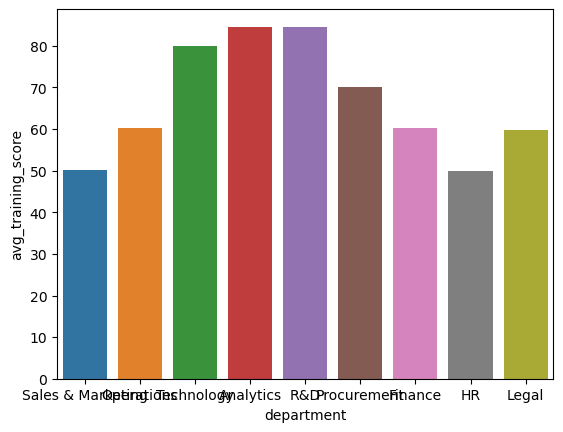

In [123]:
sns.barplot(data=train, x='department', y='avg_training_score', errorbar=None)

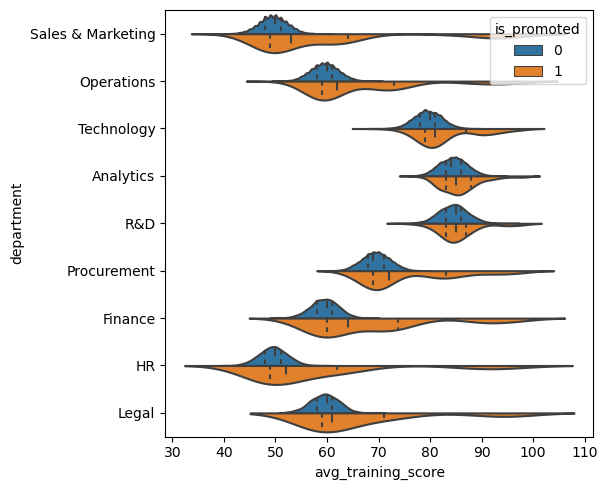

In [129]:
plt.figure(figsize=(15,5))
for i, col in enumerate(['avg_training_score']):
    plt.subplot(1,3,i+1)
    sns.violinplot(data=train, x=col, y='department',  hue='is_promoted', orient='h', split=True, scale='width', inner='quartile')
plt.tight_layout()

In [117]:
pd.crosstab(train['gender'], train['department'], normalize='index') / train['department'].value_counts()*10000 

,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
gender,,,,,,,,,
f,0.058762,0.164623,0.255055,0.087915,0.252663,0.282303,0.034979,0.114819,0.239447
m,0.234868,0.190011,0.151692,0.222515,0.152706,0.140146,0.244946,0.211115,0.158306


In [118]:
def cross_tab(col1, col2, figsize = (12,6)):
    plt.figure(figsize=figsize)
    sns.heatmap(pd.crosstab(col1, col2, normalize='index') / col2.value_counts()*10000,
                annot=True, center=0, cmap='Spectral')

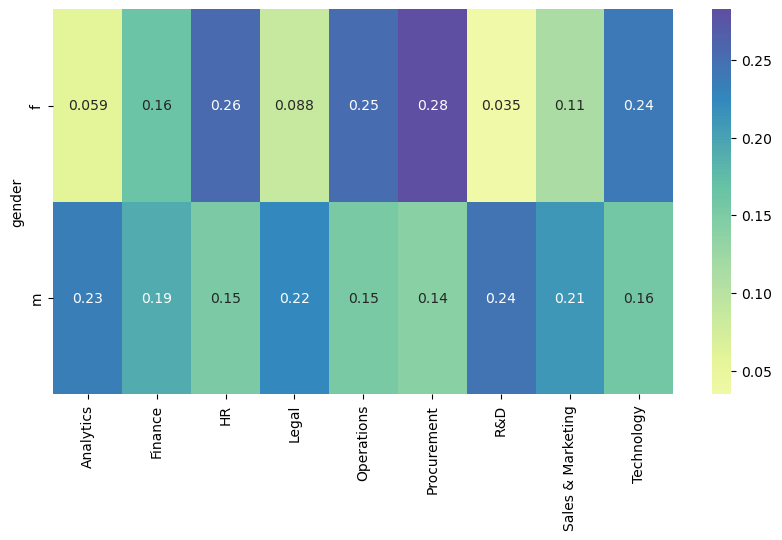

In [119]:
cross_tab(train['gender'], train['department'], (10,5))

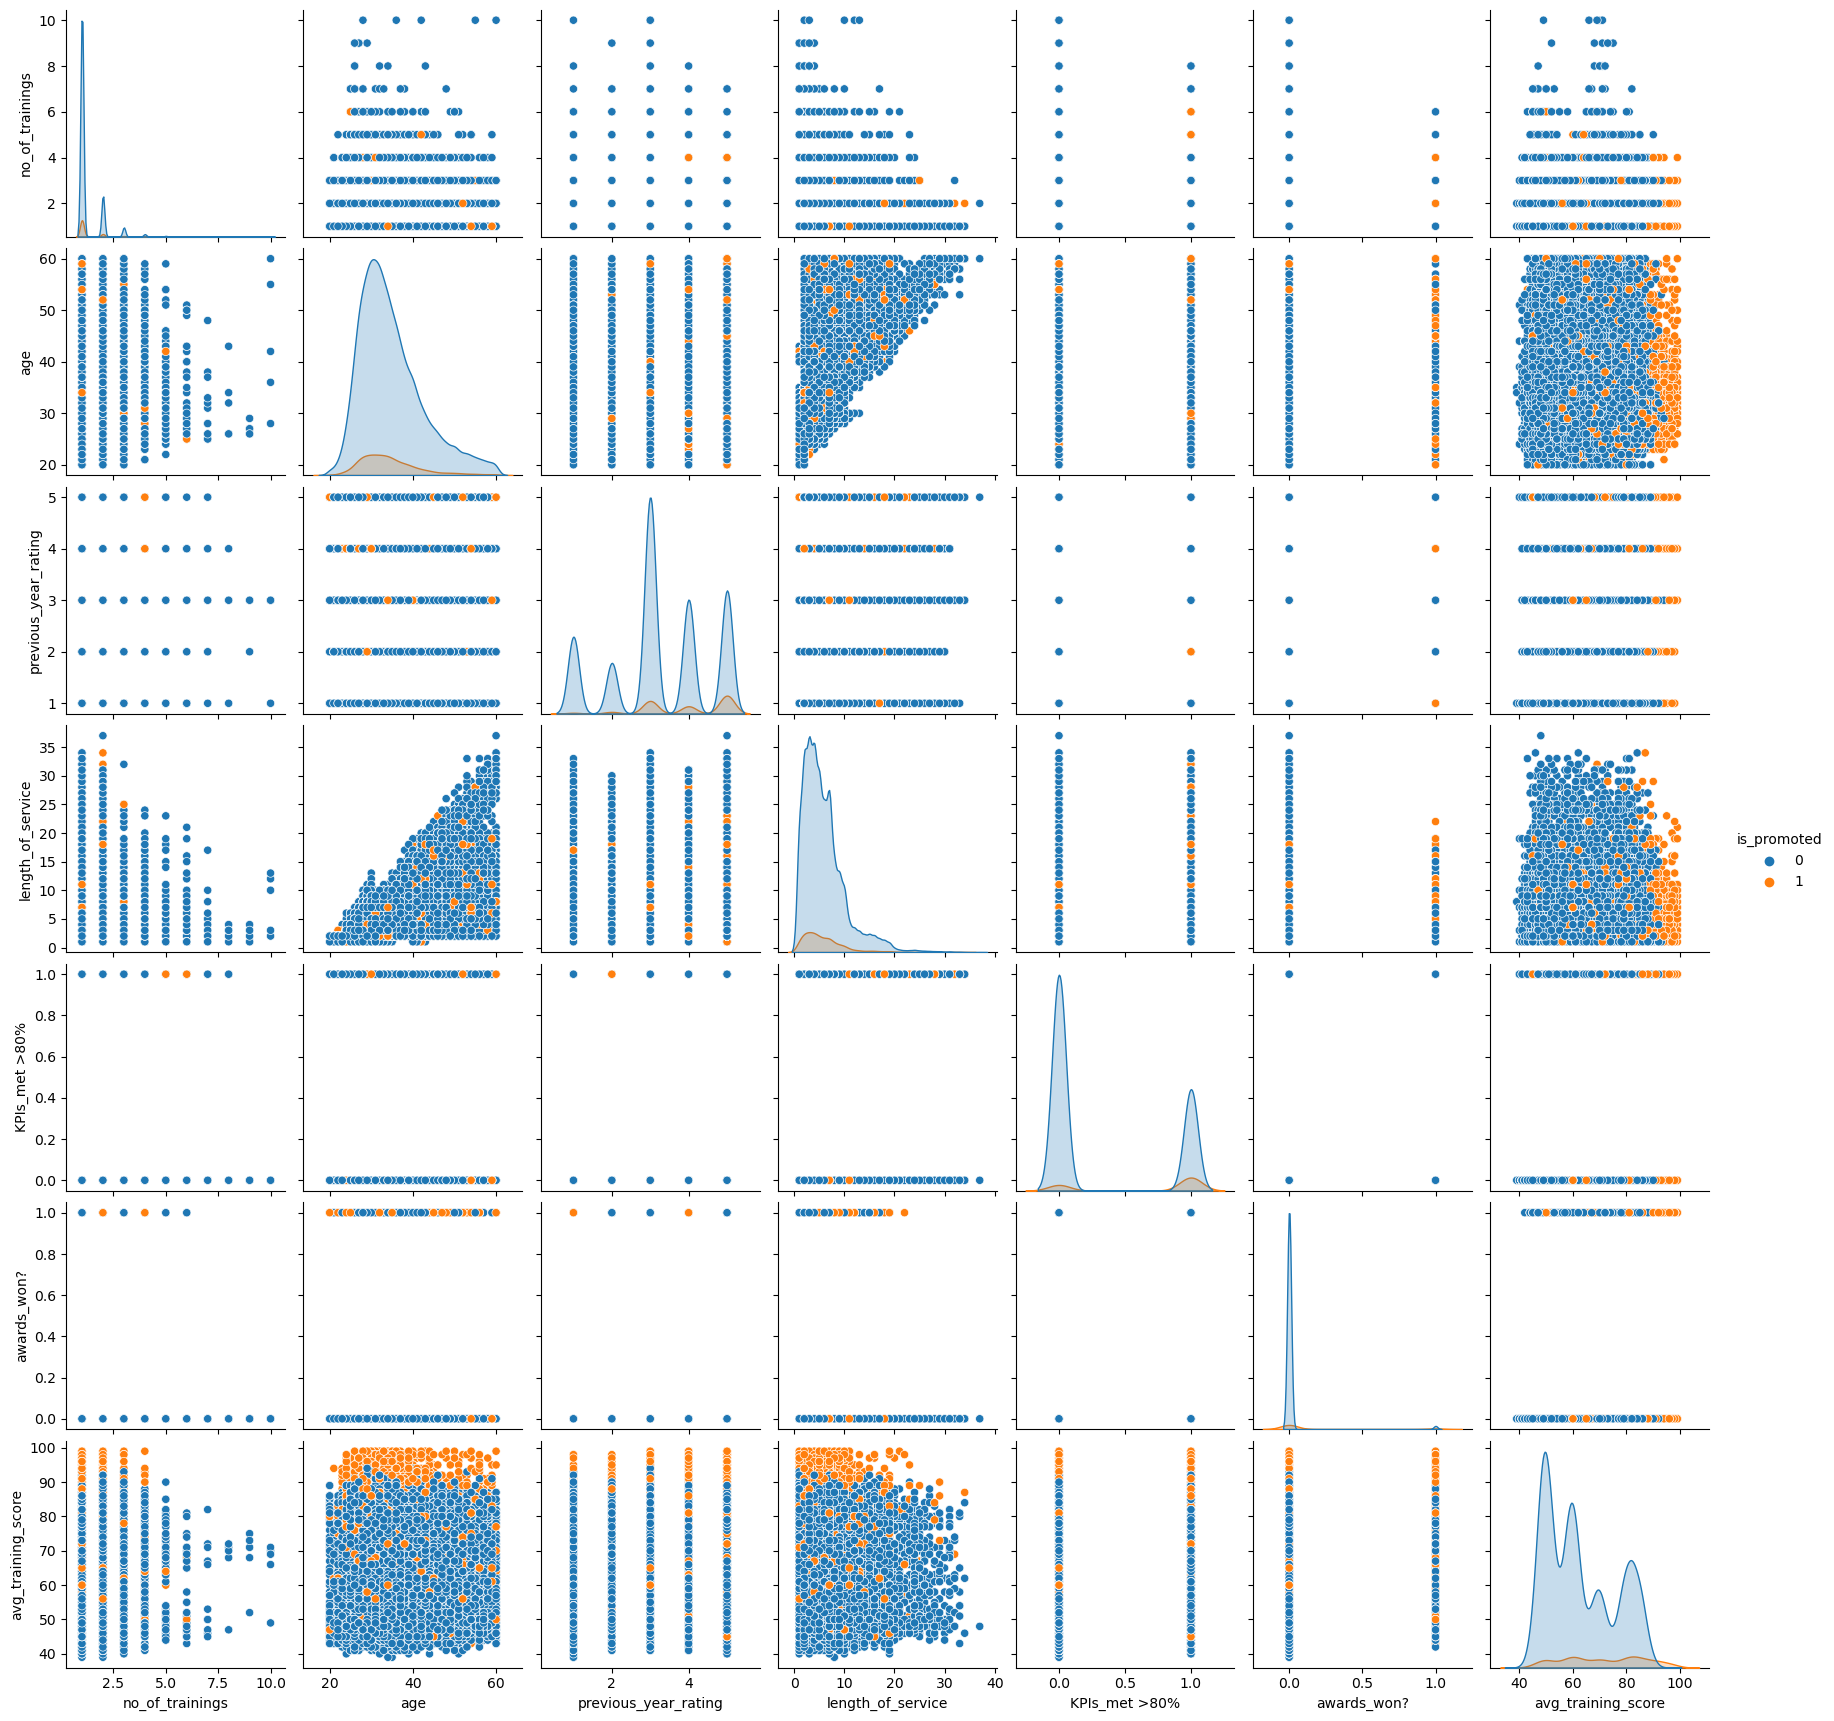

In [81]:
sns.pairplot(train.iloc[:, 5:], hue='is_promoted')

# Preprocessing

In [7]:
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [8]:
X = train.drop(columns=['is_promoted'])

In [9]:
y = train['is_promoted']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 101)

In [57]:
X_train.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score'],
      dtype='object')

In [58]:
continuous

['age', 'length_of_service', 'avg_training_score']

In [59]:
categorical

['department',
 'region',
 'education',
 'gender',
 'recruitment_channel',
 'no_of_trainings',
 'previous_year_rating',
 'KPIs_met >80%',
 'awards_won?',
 'is_promoted']

In [60]:
ohe_columns = ['department', 'region', 'gender', 'recruitment_channel']

In [61]:
ord_columns = ['education']

In [62]:
passthrough_columns = ['no_of_trainings', 'previous_year_rating', 'KPIs_met >80%', 'awards_won?']

## missing values imputation

In [63]:
X_train.isna().sum() / train.shape[0] * 100

department              0.000000
region                  0.000000
education               3.287841
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    5.668880
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
dtype: float64

In [64]:
imputer = ColumnTransformer([('cont', SimpleImputer(strategy='median'), continuous), 
                            ('cat', SimpleImputer(strategy='most_frequent'), ohe_columns+ord_columns+passthrough_columns)], 
                            verbose_feature_names_out=False).set_output(transform='pandas')

In [65]:
imputer.fit(X_train)

ColumnTransformer(transformers=[('cont', SimpleImputer(strategy='median'),
                                 ['age', 'length_of_service',
                                  'avg_training_score']),
                                ('cat', SimpleImputer(strategy='most_frequent'),
                                 ['department', 'region', 'gender',
                                  'recruitment_channel', 'education',
                                  'no_of_trainings', 'previous_year_rating',
                                  'KPIs_met >80%', 'awards_won?'])],
                  verbose_feature_names_out=False)

In [66]:
imputer.feature_names_in_

array(['department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score'], dtype=object)

In [67]:
imputer.get_feature_names_out()

array(['age', 'length_of_service', 'avg_training_score', 'department',
       'region', 'gender', 'recruitment_channel', 'education',
       'no_of_trainings', 'previous_year_rating', 'KPIs_met >80%',
       'awards_won?'], dtype=object)

In [68]:
X_train = imputer.transform(X_train)

In [69]:
X_test = imputer.transform(X_test)

## Scaling and Encoding

In [70]:
ct = ColumnTransformer(transformers=[('ohe', OneHotEncoder(min_frequency=.02, sparse_output=False), ohe_columns), 
                ('ord', OrdinalEncoder(categories=[['Below Secondary', "Bachelor's", "Master's & above"]]), ord_columns),
                                     ('scale', StandardScaler(), continuous),
                                     ('passthrough', 'passthrough', passthrough_columns)], 
                                     remainder='drop', verbose_feature_names_out=False).set_output(transform='pandas')

In [71]:
ct.fit(X_train)

ColumnTransformer(transformers=[('ohe',
                                 OneHotEncoder(min_frequency=0.02,
                                               sparse_output=False),
                                 ['department', 'region', 'gender',
                                  'recruitment_channel']),
                                ('ord',
                                 OrdinalEncoder(categories=[['Below Secondary',
                                                             "Bachelor's",
                                                             "Master's & "
                                                             'above']]),
                                 ['education']),
                                ('scale', StandardScaler(),
                                 ['age', 'length_of_service',
                                  'avg_training_score']),
                                ('passthrough', 'passthrough',
                                 ['no_of_trainings', 'previous_year_rating',
                                  'KPIs_met >80%', 'awards_won?'])],
                  verbose_feature_names_out=False)

In [72]:
ct.feature_names_in_

array(['age', 'length_of_service', 'avg_training_score', 'department',
       'region', 'gender', 'recruitment_channel', 'education',
       'no_of_trainings', 'previous_year_rating', 'KPIs_met >80%',
       'awards_won?'], dtype=object)

In [74]:
ct.get_feature_names_out()

array(['department_Analytics', 'department_Finance', 'department_HR',
       'department_Operations', 'department_Procurement',
       'department_Sales & Marketing', 'department_Technology',
       'department_infrequent_sklearn', 'region_region_11',
       'region_region_13', 'region_region_15', 'region_region_16',
       'region_region_2', 'region_region_22', 'region_region_23',
       'region_region_26', 'region_region_27', 'region_region_28',
       'region_region_31', 'region_region_4', 'region_region_7',
       'region_infrequent_sklearn', 'gender_f', 'gender_m',
       'recruitment_channel_other', 'recruitment_channel_referred',
       'recruitment_channel_sourcing', 'education', 'age',
       'length_of_service', 'avg_training_score', 'no_of_trainings',
       'previous_year_rating', 'KPIs_met >80%', 'awards_won?'],
      dtype=object)

In [75]:
X_train = ct.transform(X_train)

In [92]:
X_train = X_train.astype(float)

In [76]:
X_test = ct.transform(X_test)

In [93]:
X_test = X_test.astype(float)

# Predictions on train data

In [134]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.inspection import PartialDependenceDisplay
from sklearn.metrics import ConfusionMatrixDisplay, DetCurveDisplay, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve, roc_curve, det_curve, classification_report

In [39]:
def model_score(model):
    model.fit(X_train, y_train)
    print(model.score(X_train, y_train), model.score(X_test, y_test))
    return model

## Logistic Regression

In [94]:
lr = model_score(LogisticRegression(max_iter=2000))

0.9313725490196079 0.9319077506933294


In [41]:
lr

LogisticRegression(max_iter=2000)

In [42]:
pred = lr.predict(X_test)

In [43]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
pred_prob = pd.DataFrame(lr.predict_proba(X_test), index=y_test.index)

In [45]:
# pred_m = (pred_prob >= .4).astype(int)

In [46]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.96     12543
           1       0.83      0.25      0.39      1159

    accuracy                           0.93     13702
   macro avg       0.88      0.62      0.68     13702
weighted avg       0.93      0.93      0.92     13702



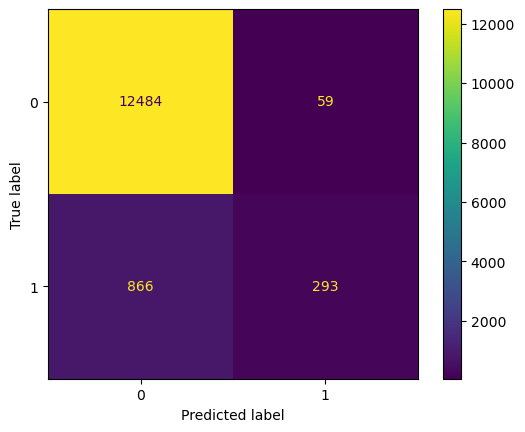

In [47]:
ConfusionMatrixDisplay.from_predictions(y_test, pred)

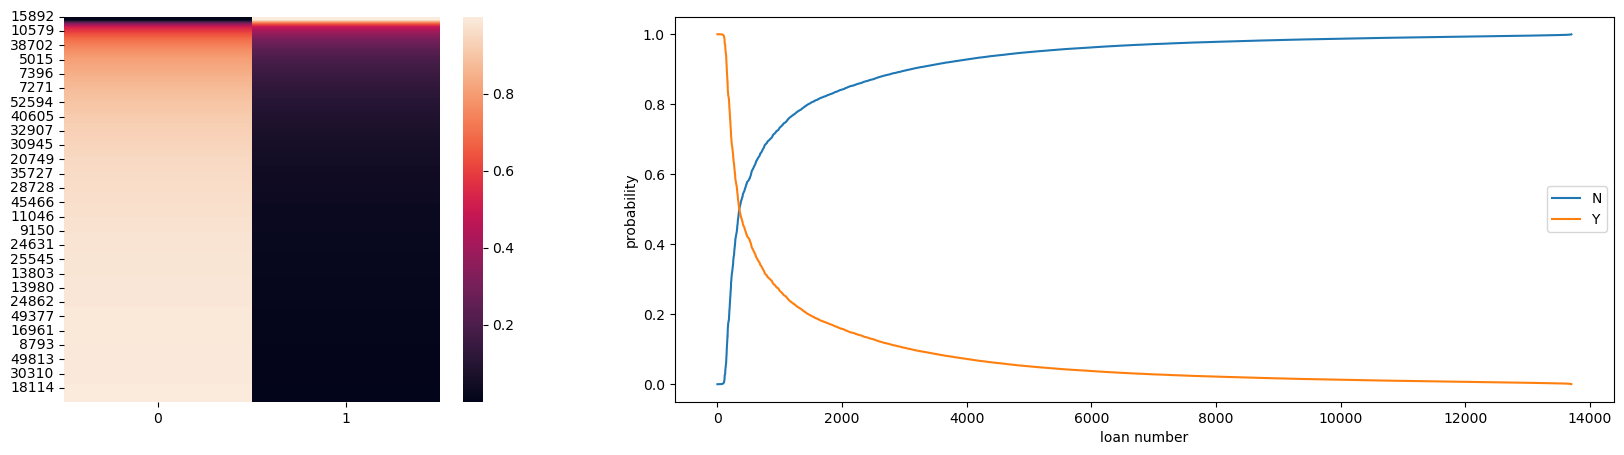

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5), gridspec_kw={'width_ratios': [1, 2]})
sns.heatmap(pred_prob.sort_values(by=0), ax=ax1)
ax2.plot(pred_prob.sort_values(by=0).values)
ax2.set_xlabel('loan number')
ax2.set_ylabel('probability')
ax2.legend(['N', 'Y'])

In [49]:
def classification_metrics(y_test, pred_pos):
    
    fig, axes = plt.subplots(2,3, figsize=(15,8))
    
    # precision-recall curve with maximum f1 score marked and confusion matrix at that point
    precision, recall, thresholds = precision_recall_curve(y_test, pred_pos)
    f1 = (2 * precision * recall) / (precision + recall)
    index_max_f1 = np.nanargmax(f1)
    f1_thresh = thresholds[index_max_f1]
    
    PrecisionRecallDisplay.from_predictions(y_test, pred_pos, ax=axes[0, 0])
    axes[0, 0].scatter(recall[index_max_f1], precision[index_max_f1], 
                       color='green', label=f'max f1 {f1[index_max_f1]:.2f} at {f1_thresh:.2f}')
    axes[0, 0].legend()

    ConfusionMatrixDisplay.from_predictions(y_test, (pred_pos > f1_thresh) * 1, ax=axes[1, 0])
    
    
    # ROC curve with maximum Youden's J marked and confusion matrix at that point
    fpr, tpr, thresholds = roc_curve(y_test, pred_pos)
    Youdens_J = tpr - fpr
    index_max_J = np.nanargmax(Youdens_J)
    J_thresh = thresholds[index_max_J]
    
    RocCurveDisplay.from_predictions(y_test, pred_pos, ax=axes[0, 1])
    axes[0, 1].scatter(fpr[index_max_J], tpr[index_max_J], 
                       color='green', label=f'max J {Youdens_J[index_max_J]:.2f} at {J_thresh:.2f}')
    axes[0, 1].plot([0, 1], [0, 1],'r--')
    axes[0, 1].legend()
    
    ConfusionMatrixDisplay.from_predictions(y_test, (pred_pos > J_thresh) * 1, ax=axes[1, 1])
    
    
    # Det curve with minimum total error marked and confusion matrix at that point
    fpr, fnr, thresholds = det_curve(y_test, pred_pos)
    error = fpr + fnr
    index_min_error = np.nanargmin(error)
    error_thresh = thresholds[index_min_error]
    
    DetCurveDisplay.from_predictions(y_test, pred_pos, ax=axes[0, 2])
    axes[0, 2].scatter(sp.stats.norm.ppf(fpr[index_min_error]), sp.stats.norm.ppf(fnr[index_min_error]),
                       color='green',label=f'min error {error[index_min_error]:.2f} at {error_thresh:.2f}')
    axes[0,2].legend()
    
    ConfusionMatrixDisplay.from_predictions(y_test, (pred_pos > error_thresh) * 1, ax=axes[1, 2])
    

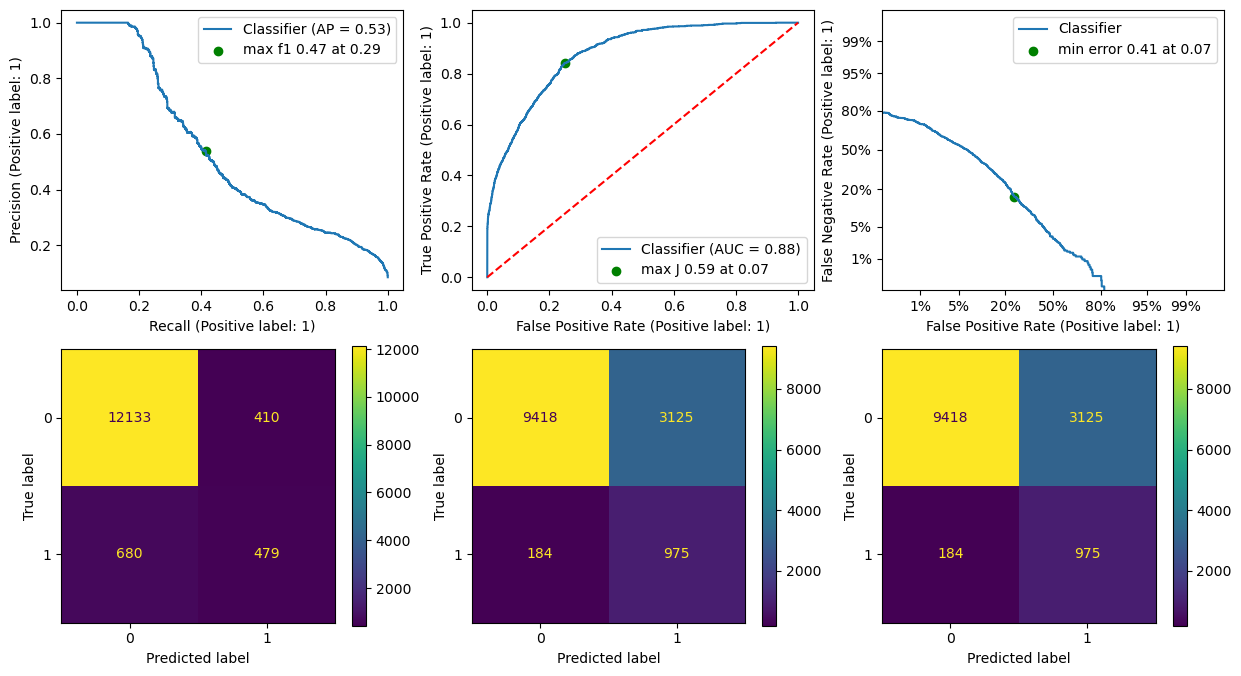

In [121]:
classification_metrics(y_test, pred_prob[1])

In [126]:
np.where(pred_prob[1] > .29, 1, 0)

array([0, 0, 0, ..., 1, 0, 0])

In [127]:
print(classification_report(y_test, np.where(pred_prob[1] > .29, 1, 0)))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     12543
           1       0.54      0.41      0.47      1159

    accuracy                           0.92     13702
   macro avg       0.74      0.69      0.71     13702
weighted avg       0.91      0.92      0.92     13702



Text(0.5, 1.0, 'blue - actual true')

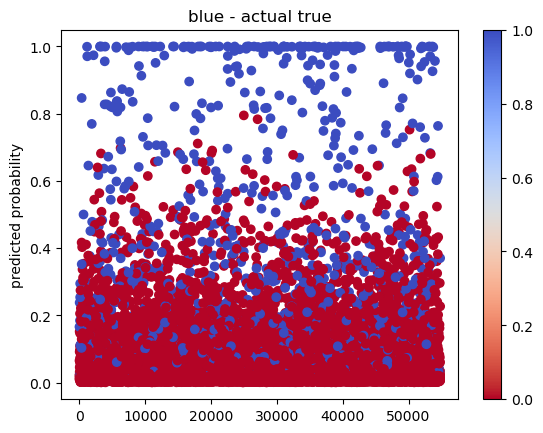

In [128]:
plt.scatter(pred_prob.index, pred_prob[1], c=y_test.values, cmap='coolwarm_r')
plt.colorbar()
plt.ylabel('predicted probability')
plt.title('blue - actual true')

In [129]:
probabilities = pd.DataFrame({'prob':pred_prob[1], 'actual':y_test}).sort_values(['prob'], ascending=False)

Text(0.5, 1.0, 'blue - actual true')

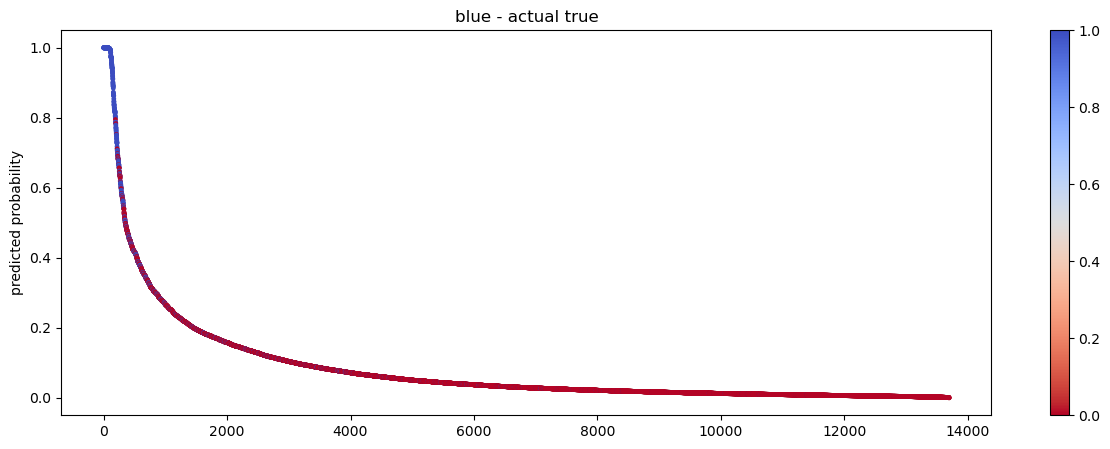

In [130]:
plt.figure(figsize=(15,5))
plt.scatter(range(len(probabilities)), probabilities['prob'], c=probabilities['actual'], s=6, cmap='coolwarm_r')
plt.colorbar()
plt.clim(0,1)
plt.ylabel('predicted probability')
plt.title('blue - actual true')

In [51]:
coeff = pd.DataFrame({'columns':X_train.columns, 'coef':(lr.coef_[0])})
coeff.sort_values(by='coef', ascending=False).head(10)

,columns,coef
7,department_Sales & Marketing,4.860906
2,department_HR,4.304318
51,avg_training_score,3.875952
4,department_Operations,1.894930
54,KPIs_met >80%,1.776489
1,department_Finance,1.751335
3,department_Legal,1.533977
55,awards_won?,1.474127
37,region_region_4,0.721308
26,region_region_25,0.562179


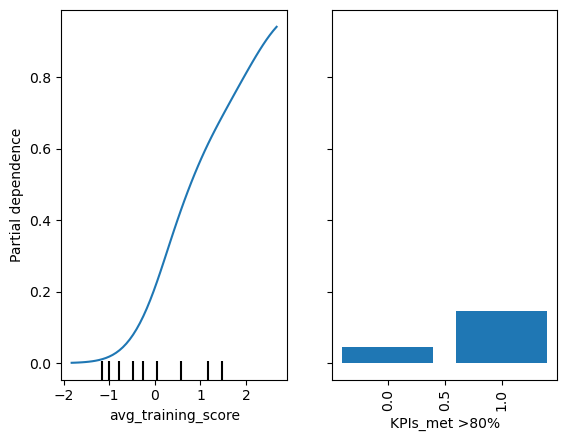

In [147]:
PartialDependenceDisplay.from_estimator(lr, X_train, features=['avg_training_score', 'KPIs_met >80%'], 
                                        categorical_features=['KPIs_met >80%'])

In [130]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [131]:
from statsmodels.tools.tools import add_constant

In [132]:
xx = add_constant(X_train)

In [133]:
pd.DataFrame({'feature': X_train.columns, 'vif':[variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]})

C:\Users\dsanr\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,vif
0,department_Analytics,inf
1,department_Finance,inf
2,department_HR,inf
3,department_Operations,inf
4,department_Procurement,inf
5,department_Sales & Marketing,inf
6,department_Technology,inf
7,department_infrequent_sklearn,inf
8,region_region_11,inf
9,region_region_13,inf


In [97]:
pd.DataFrame({'feature': X_train.columns, 'vif': np.linalg.inv(X_train.corr()).diagonal()}).sort_values(by='vif', ascending=True)

,feature,vif
21,region_infrequent_sklearn,-5.698549e+14
12,region_region_2,-5.516488e+14
13,region_region_22,-3.278605e+14
20,region_region_7,-2.571268e+14
10,region_region_15,-1.524626e+14
9,region_region_13,-1.450307e+14
15,region_region_26,-1.280001e+14
18,region_region_31,-1.088514e+14
19,region_region_4,-9.468764e+13
16,region_region_27,-9.387871e+13


## Random Forest

In [151]:
parameters = {'n_estimators': [100, 500, 1000], 'min_samples_split': (3,5), 'max_depth':(5, 7, 9)}

In [152]:
clf = GridSearchCV(RandomForestClassifier(), param_grid=parameters, n_jobs=-1, verbose=1)

In [153]:
distributions = {'n_estimators': sp.stats.randint(100, 1000), 
                 'min_samples_split': sp.stats.randint(2, 8), 
                 'max_depth': sp.stats.randint(3, 8)}

In [155]:
clf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=distributions, n_iter=10, n_jobs=-1, verbose=1)

In [156]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002240E624D00>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002240DBFEFA0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002240E604520>},
                   verbose=1)

In [157]:
clf.best_estimator_

RandomForestClassifier(max_depth=7, min_samples_split=3, n_estimators=311)

In [158]:
clf.best_score_

0.9234174921680571

In [174]:
rf = model_score(RandomForestClassifier(n_estimators=311, min_samples_split=3, max_depth=7))

0.9235148153554226 0.9241716537731718


In [163]:
pred = rf.predict(X_test)

In [181]:
pred_prob = pd.DataFrame(rf.predict_proba(X_test), index=y_test.index)

In [164]:
pred

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [166]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.70      0.81     12543
           1       0.20      0.84      0.33      1159

    accuracy                           0.71     13702
   macro avg       0.59      0.77      0.57     13702
weighted avg       0.91      0.71      0.77     13702



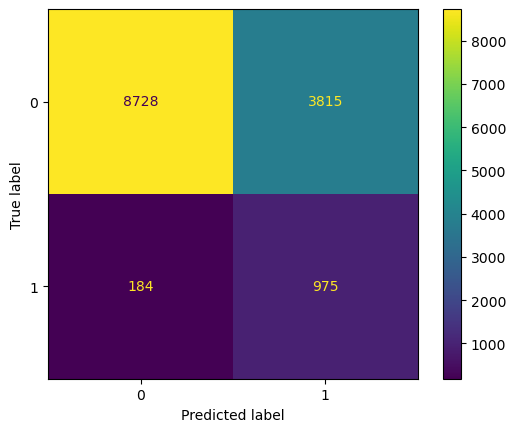

In [167]:
ConfusionMatrixDisplay.from_predictions(y_test, pred)

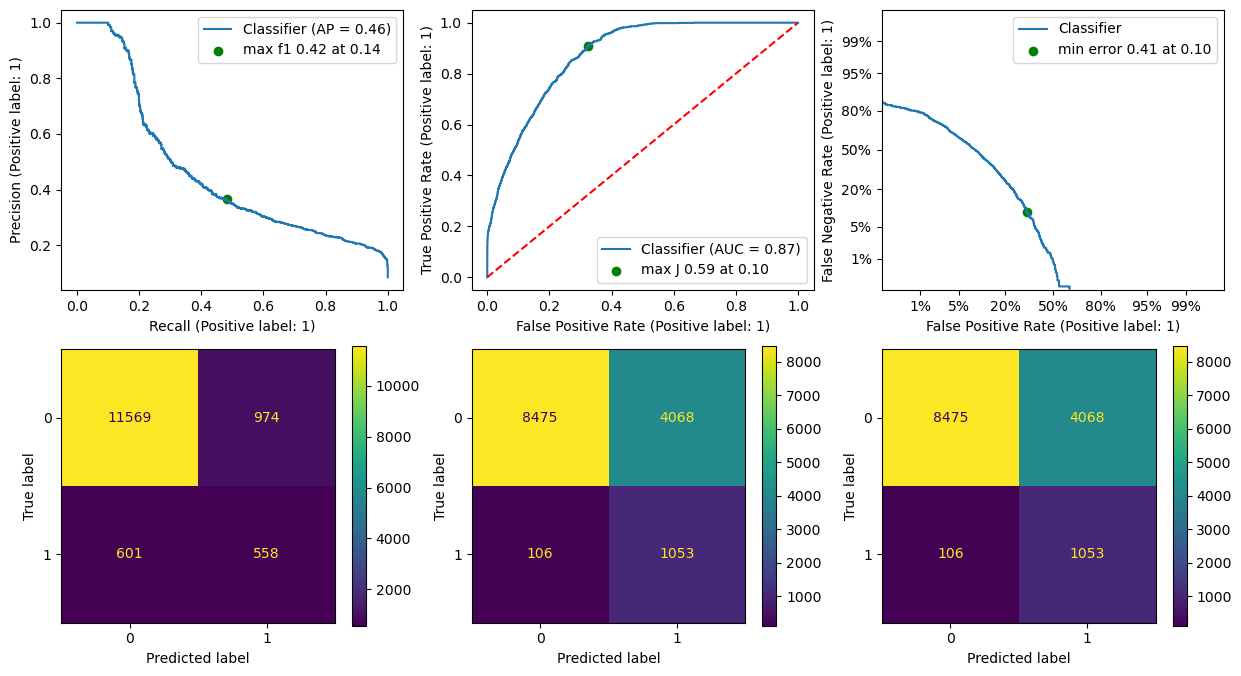

In [182]:
classification_metrics(y_test, pred_prob[1])

In [180]:
feature_imp = pd.DataFrame({'columns':rf.feature_names_in_, 'coef':rf.feature_importances_})
feature_imp.sort_values(by='coef', ascending=False).head(10)

,columns,coef
51,avg_training_score,0.432080
54,KPIs_met >80%,0.189773
55,awards_won?,0.142051
53,previous_year_rating,0.089139
7,department_Sales & Marketing,0.017382
49,age,0.016822
50,length_of_service,0.014028
0,department_Analytics,0.011075
8,department_Technology,0.010052
48,education,0.006886


## Gradient Boosting

In [192]:
gb = model_score(GradientBoostingClassifier())

In [193]:
gb

(GradientBoostingClassifier(), 0.9380164212172553, 0.93772425956334)

In [194]:
pred = lr[0].predict(X_test)

In [195]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [196]:
pred_prob = lr[0].predict_proba(X_test)

In [206]:
pred_m = (pred_prob >= .4).astype(int)

In [207]:
pred = pred_m[:, 1]

In [208]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     15061
           1       0.69      0.31      0.43      1382

    accuracy                           0.93     16443
   macro avg       0.81      0.65      0.69     16443
weighted avg       0.92      0.93      0.92     16443



In [209]:
f1_score(y_test, pred)

0.4261477045908183

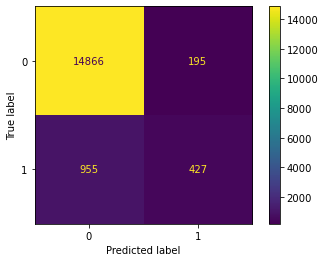

In [210]:
ConfusionMatrixDisplay.from_predictions(y_test, pred)

# test data

In [141]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


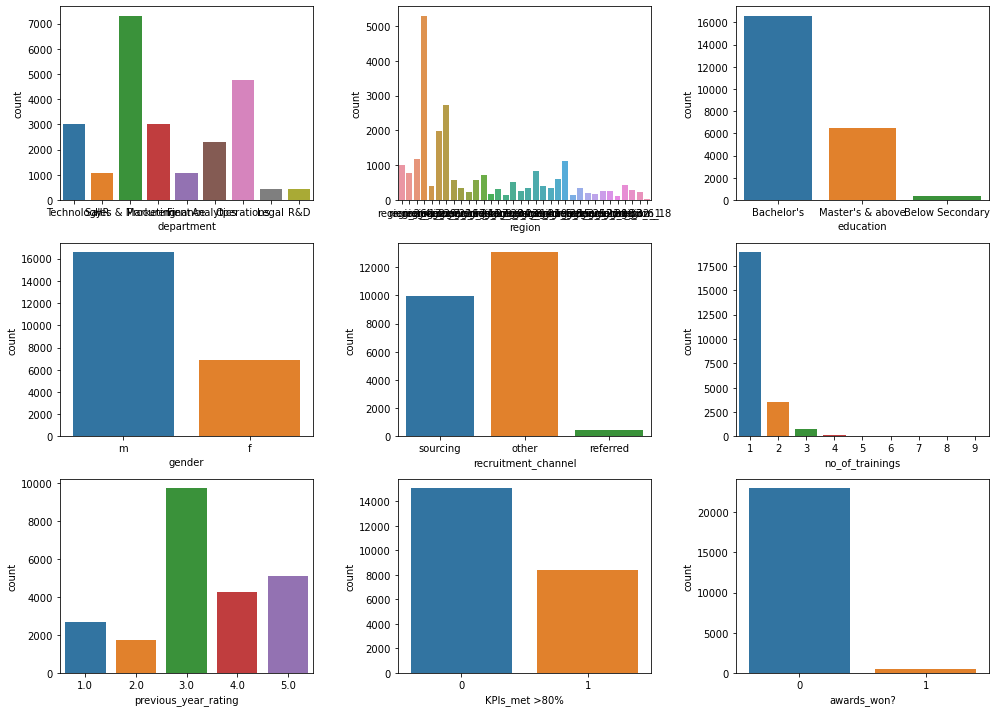

In [273]:
plt.figure(figsize=(14,10))
for i, col in enumerate(categorical):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=test, x=col)
plt.tight_layout()

In [142]:
employee_id = test['employee_id']

In [143]:
test.drop(columns=['employee_id'], inplace=True)

In [144]:
test.isna().sum() / test.shape[0] * 100

department              0.000000
region                  0.000000
education               4.401873
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.713921
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
dtype: float64

## pre-processing

In [145]:
test['education'].fillna(train['education'].mode()[0], inplace=True)

In [146]:
test['previous_year_rating'].fillna(train['previous_year_rating'].mode()[0], inplace=True)

In [147]:
test['gender'] = test['gender'].apply(lambda x : 1 if x=='Male' else 0)

In [148]:
test['education'] = test['education'].apply(lambda x : 2 if x=="Master's & above"  else (1 if x=="Bachelor's" else 0))

In [149]:
for i in continuous:
    test[i] = test[i].apply(lambda x : np.log(x))

In [150]:
test_trans = pd.DataFrame(ct.transform(test), columns=ct.get_feature_names_out())

In [151]:
test_trans

,ohe__department_Analytics,ohe__department_Finance,ohe__department_HR,ohe__department_Legal,ohe__department_Operations,ohe__department_Procurement,ohe__department_R&D,ohe__department_Sales & Marketing,ohe__department_Technology,ohe__region_region_1,...,ohe__recruitment_channel_sourcing,scale__age,scale__length_of_service,scale__avg_training_score,remainder__education,remainder__gender,remainder__no_of_trainings,remainder__previous_year_rating,remainder__KPIs_met >80%,remainder__awards_won?
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,-1.679663,-2.058969,1.043593,1.0,0.0,1.0,3.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.449103,0.123844,-0.944530,1.0,0.0,1.0,3.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,-0.449103,-0.178796,-1.338690,1.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,-0.449103,0.921034,0.226019,1.0,0.0,3.0,2.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,-0.606760,0.580187,-0.080483,1.0,0.0,1.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,-1.679663,-2.058969,-0.080483,0.0,0.0,1.0,3.0,0.0,0.0
23486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,-0.449103,0.580187,0.851815,1.0,0.0,1.0,3.0,0.0,0.0
23487,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,-1.294807,-0.178796,-1.040093,1.0,0.0,1.0,4.0,0.0,0.0
23488,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,-1.113347,-2.058969,0.583647,1.0,0.0,3.0,3.0,0.0,0.0


## prediction

In [250]:
pred = rf[0].predict(test_trans)

In [251]:
pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [252]:
pred_prob = lr[0].predict_proba(test_trans)

In [253]:
pred_m = (pred_prob >= .4).astype(int)

In [254]:
pred = pred_m[:, 1]

In [255]:
result = pd.DataFrame(pred, employee_id).reset_index()
result.columns=['employee_id', 'is_promoted']
result

,employee_id,is_promoted
0,8724,1
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0


In [256]:
result['is_promoted'].value_counts()

0    15166
1     8324
Name: is_promoted, dtype: int64

In [257]:
result.to_csv(r'D:\engineering\CS\AI ML Blackbelt +\tests\HR Analytics\submission1.csv', index=False)